In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [5]:
# Create a normal distribution from Tensorflow Distributions
# Normal distribution with mean=0 and standard deviation=1
normal = tfd.Normal(loc=0,scale=1)

In [6]:
# Sample from the chosen distribution...

normal.sample(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.33875433, 0.3449861 ], dtype=float32)>

In [7]:
# ... or sample multiple times

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.61346006, -1.0256168 , -1.1752816 , -0.79817134,  0.31040153,
       -0.31265935,  0.86418086, -0.02085696, -0.093201  , -1.1740862 ],
      dtype=float32)>

In [10]:
# Obtain value of probability's density at certain position

normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [12]:
# Obtain value of logprobability

normal.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.4189385>

In [13]:
# Verify that this really is the log of the probability

np.log(normal.prob(1))

-1.4189385

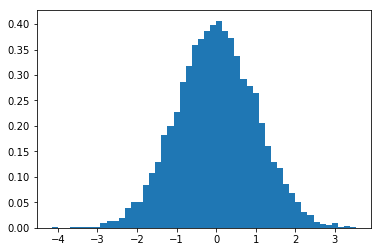

In [14]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

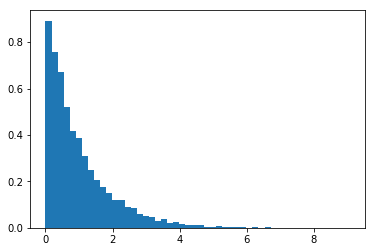

In [17]:
# Do the same for the exponential distribution

exponential = tfd.Exponential(rate=1)
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

In [18]:
# Sample as before

exponential.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.49917367, 2.7285445 , 0.5229746 ], dtype=float32)>

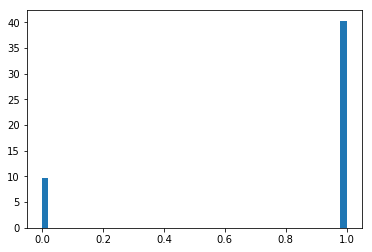

In [21]:
# Create a Bernoulli distribution (discrete) where roughly 0.8(80%) of them will gave you value of 1.

bernauli = tfd.Bernoulli(probs=0.8)
bernauli.sample(5)
plt.hist(bernauli.sample(10000), bins=50, density=True)
plt.show()

#### A word of caution on discrete distributions

In [22]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(bernauli.prob(k),k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [23]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [24]:
# Evaluate it as before

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(my_bernoulli(0.8,k),k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


#### Work with batch distributions

In [26]:
# Create a batched Bernoulli distribution, This gave the Batch of 5 different bernoulli distribution,
# Each using one of the probabilities

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [30]:
# Sample from it, noting the shape

bernoulli_batch.sample(3)

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1]], dtype=int32)>

In [31]:
# Use a batch shape with higher rank, This create the High dimensional bernoulli distribution.

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [32]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(3)

<tf.Tensor: shape=(3, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[1, 1],
         [1, 0],
         [1, 1]]],


       [[[1, 1],
         [1, 1],
         [0, 1]]]], dtype=int32)>

In [34]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.log_prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-0.6931472 , -0.6931472 ],
        [-1.609438  , -0.35667497],
        [-1.3862944 , -0.2876821 ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [40]:
# Define 2D multivariate Gaussian with diagonal covariance matrix, 
# 2 dimension multivariate dist, mean and variance around each axis.

normal_diag = tfd.MultivariateNormalDiag(loc=[0,1],scale_diag=[1,20])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [41]:
# Sample from it

normal_diag.prob([1,2])

<tf.Tensor: shape=(), dtype=float32, numpy=0.004820588>

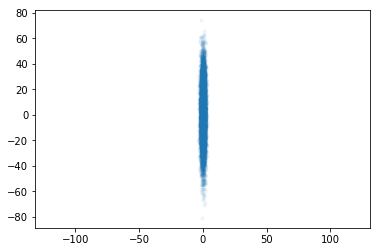

In [43]:
# Make a plot
# Can spread out the data around any one of the dimension by changing variance for any one of the dimensions.
# Can't rotate this distribution by 45 degree as we choose off diagonals zero.

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [46]:
# Create three "batches" of multivariate normals
## Creating mutiple batches of multiNormal distribution with respective mean and variance.

batch_normal_diag = tfd.MultivariateNormalDiag(loc=[[0,0],[0,0],[0,0]],scale_diag=[[1,2],[2,1],[2,2]])
batch_normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [51]:
# Sample from it
# Sample shape(4,3,2) - 4 is the number of samples, 3 is the batch of multiNorm dist, 2 is the dimension of distribution.

sampled= batch_normal_diag.sample(4)
sampled

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[-0.9867209 ,  0.56479365],
        [-3.5590606 , -0.8332345 ],
        [-1.0895497 ,  1.1468816 ]],

       [[ 2.3395588 ,  0.6711241 ],
        [-2.6179273 ,  0.31611338],
        [ 1.6760064 , -1.1653652 ]],

       [[ 0.05544071, -2.887044  ],
        [-1.4737035 , -0.02187214],
        [ 1.2962348 ,  1.6060469 ]],

       [[ 0.33245984,  1.7251977 ],
        [ 0.7570891 ,  1.5695807 ],
        [ 1.0683043 , -0.44589233]]], dtype=float32)>

In [53]:
# Compute log probs
# Shape is (number of samples, Batch size)

batch_normal_diag.log_prob(sampled)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-3.0577073, -4.4615283, -3.5369782],
       [-5.324093 , -3.437681 , -3.7450557],
       [-3.574439 , -2.8027387, -3.7566228],
       [-2.9583273, -3.8344638, -3.391683 ]], dtype=float32)>

In [54]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = batch_normal_diag.sample(10000)

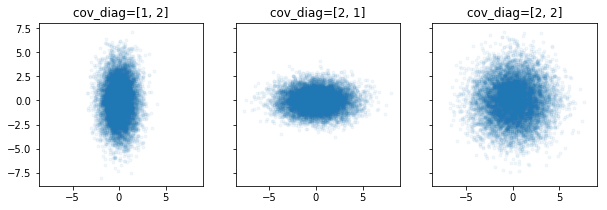

In [55]:
# Plot samples from the batched multivariate Gaussian
## Plot each of the gaussian separately.

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [56]:
0.5 * tf.ones((2,4,5))

<tf.Tensor: shape=(2, 4, 5), dtype=float32, numpy=
array([[[0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5]]], dtype=float32)>

In [59]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components.
## Independent help to convert batches of univariate distribution to Multivariate one.
locs = [-1,1]
scales = [0.5,1]
batch_of_normals = tfd.Normal(loc=locs,scale=scales)

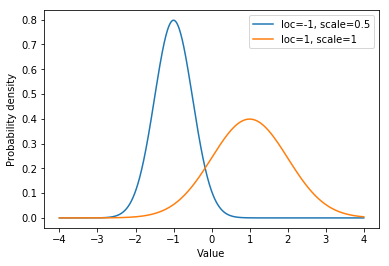

In [61]:
# Two Univariate distribution, one centered around -1 and other around 1, with different Spread or variance

import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [62]:
# Check their batch_shape and event_shape

batch_of_normals.batch_shape, batch_of_normals.event_shape

(TensorShape([2]), TensorShape([]))

In [65]:
# Use Independent to convert the batch shape to the event shape
## Converted the Univariate into bivariate distribution

bivariate_normal_from_Independent = tfd.Independent(batch_of_normals,reinterpreted_batch_ndims=1)

In [66]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

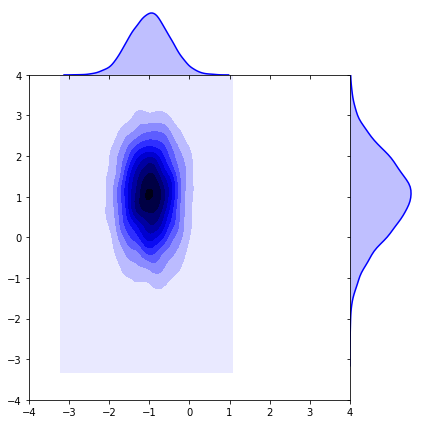

In [67]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_Independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

In [69]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)

bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs,scale_diag=scales)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

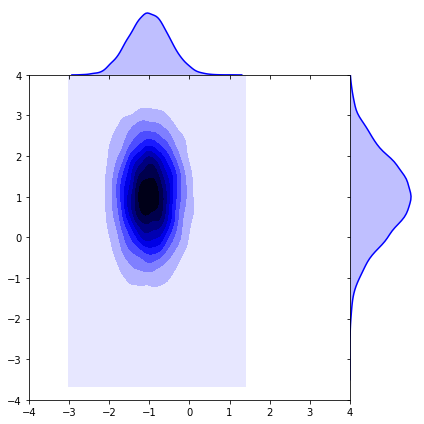

In [70]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

## Will create the same Multivariate distribution as the Above one.

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [71]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [72]:
# Highlight batch_shape

normals_batch_3_event_2 = tfd.Independent(normals_batch_3by2_event_1)
normals_batch_3_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid



In [73]:
# Evaluate log_prob

normals_batch_3_event_2.log_prob([[-10,10],
                                 [100,100],
                                 [1,1]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [74]:
# Can reinterpret _all_ batch dimensions as event dimensions

normals_batch_1_event_3by2 = tfd.Independent(normals_batch_3by2_event_1,reinterpreted_batch_ndims=2)

In [75]:
# Take log_probs 

normals_batch_1_event_3by2.log_prob([[-10,10],
                                 [100,100],
                                 [1,1]])

<tf.Tensor: shape=(), dtype=float32, numpy=-4121.619>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [4]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [12]:
# Get the train data

newsgroups_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',subset='train')

In [13]:
# More information about the data set

newsgroups_data['DESCR']

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total            

In [14]:
# Example article

newsgroups_data['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [15]:
# Associated label
newsgroups_data['target'][0]


7

In [16]:
# Name of label

newsgroups_data['target_names'][7]

'rec.autos'

In [17]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data['data'])

count_vectorizer = CountVectorizer(input='content', binary=True,
                                   max_df=0.25, min_df=1.01/n_documents) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data']) # input is a list of strings


In [18]:
# Check shape

binary_bag_of_words.shape

(11314, 56365)

In [19]:
# Check that the fit has been successful

count_vectorizer.inverse_transform(binary_bag_of_words[0,:])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [20]:
# Dict that will be useful later 

inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [21]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [22]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [24]:
# Define a distribution for each class

batch_of_bernoullis = tfd.Bernoulli(probs=theta)
batch_of_bernoullis
p_x_given_y = tfd.Independent(batch_of_bernoullis,reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [25]:
# Take a sample of words from each class

n_samples = 10
sample = p_x_given_y.sample(n_samples)
sample.shape

TensorShape([10, 20, 56365])

In [26]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [27]:
# Indicators for words that appear in the sample

class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [28]:
# Perform inverse transform to test quality of fit

count_vectorizer.inverse_transform(class_sample)

[array(['14', '18', '25', '29', 'able', 'accepted', 'again', 'also',
        'although', 'ancient', 'andrew', 'aquinas', 'aren', 'basic',
        'become', 'been', 'beginning', 'beings', 'beliefs', 'believe',
        'best', 'bless', 'books', 'borrow', 'brain', 'caught', 'center',
        'certainly', 'children', 'choice', 'christians', 'clear', 'come',
        'consider', 'consultant', 'convict', 'correct', 'covington',
        'darius', 'development', 'different', 'divorced', 'doubt',
        'during', 'ecclesiastical', 'effective', 'else', 'embrace',
        'environmentalism', 'etc', 'even', 'everyone', 'fact', 'faith',
        'faithfully', 'father', 'financial', 'finding', 'followed',
        'forbidden', 'found', 'fun', 'furthermore', 'gaus', 'general',
        'glory', 'good', 'groups', 'held', 'historically', 'home',
        'however', 'inconceivable', 'infinite', 'institute', 'interpreted',
        'into', 'ironic', 'isn', 'issues', 'john', 'johnson', 'josh',
        'last', 

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [3]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [4]:
# Sample

normal_distributions.sample(2)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[-1.2961674 , -4.477743  ],
        [-0.34441808, -4.4648843 ],
        [-3.1421852 ,  0.9847862 ]],

       [[ 0.8520931 , -3.5757518 ],
        [ 0.73529404,  2.0043614 ],
        [ 5.6922107 ,  0.38246575]]], dtype=float32)>

In [5]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [6]:
# Use independent to move part of the batch shape

ind_normal_distribution = tfd.Independent(normal_distributions,reinterpreted_batch_ndims=1)
ind_normal_distribution

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [7]:
# Draw some samples

samples = ind_normal_distribution.sample(4)
samples

<tf.Tensor: shape=(4, 2, 2, 3), dtype=float32, numpy=
array([[[[ 0.43550175,  1.8449861 ,  0.53759503],
         [ 0.08580025,  0.83852386,  3.3801994 ]],

        [[ 1.7856338 ,  1.7646517 ,  7.2773027 ],
         [ 0.22291803,  1.229949  ,  0.91765696]]],


       [[[ 0.18104166,  1.5165684 ,  1.1115004 ],
         [ 0.0241417 ,  1.6443346 ,  2.2129493 ]],

        [[ 1.8314601 ,  2.3730211 ,  7.9913716 ],
         [ 1.21605   ,  0.29694557,  0.5654051 ]]],


       [[[ 0.13725404,  2.2037678 ,  1.1053156 ],
         [ 0.15253423, -0.5715581 ,  1.4947981 ]],

        [[ 1.6202079 ,  0.77482855,  7.8831754 ],
         [ 1.5205522 ,  3.4803462 ,  1.090857  ]]],


       [[[ 0.1264881 ,  0.7203603 ,  1.085191  ],
         [ 0.20146215,  2.7723958 ,  2.3356378 ]],

        [[ 1.9050044 ,  2.7961767 ,  7.108684  ],
         [ 1.7284667 ,  2.497467  ,  2.647406  ]]]], dtype=float32)>

In [10]:
# `[B, E]` shaped input
samples = tf.random.uniform((2,2,3))
ind_normal_distribution.log_prob(samples)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-12.21836 , -70.394684], dtype=float32)>

In [11]:
# `[E]` shaped input (broadcasting over batch size)

samples = tf.random.uniform((2,3))
ind_normal_distribution.log_prob(samples)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-12.346934, -78.85823 ], dtype=float32)>

In [13]:
#`[S, B, E]` shaped input (broadcasting over samples)

samples = tf.random.uniform((9,2,2,3))
ind_normal_distribution.log_prob(samples)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[-10.139837, -71.34117 ],
       [ -9.772417, -72.8571  ],
       [-12.456754, -68.5202  ],
       [ -9.006897, -71.11014 ],
       [ -9.342809, -81.18157 ],
       [ -9.947431, -68.748116],
       [ -7.176448, -66.988945],
       [-11.469181, -80.726776],
       [-10.869421, -64.40857 ]], dtype=float32)>

In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]



#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [15]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

In [43]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 0.1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [44]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [45]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 0.1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [46]:
# Run the function 

priors = class_priors(n_classes=len(categories),labels=train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [47]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distribution(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoullis,reinterpreted_batch_ndims=1)
    return dist
tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [48]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist,sample,priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors),cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood,axis=-1,keepdims=True)
    log_prob = joint_likelihood - norm_factor
    return log_prob

#### Computing log_probs

In [49]:
# Predicting one example from our test data

log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.5459930e+01, -2.3651123e-03, -6.0474854e+00, -4.9437531e+01],
      dtype=float32)>

In [50]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.8496961488207146


In [42]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=0.1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

f1 from sklean  0.8496961488207146


***
<a id='trainable_distributions'></a>
## Trainable Distributions

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [4]:
# Define an exponential distribution

exponential = tfd.Exponential(rate=0.4,name='exp')

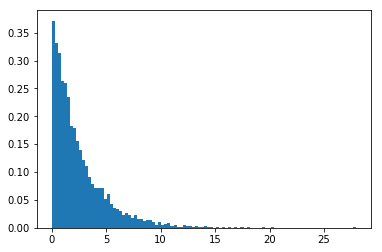

In [5]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [6]:
# Define an exponential distribution with a trainable rate parameter

exp_train = tfd.Exponential(rate=tf.Variable(1.,name='exp'),name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'exp:0' shape=() dtype=float32, numpy=1.0>,)

In [7]:
# Define the negative log likelihood

def nll(x_train,distribution):
    return -1*tf.reduce_mean(distribution.log_prob(x_train))

In [8]:
# Define a function to compute the loss and gradients

@tf.function
def get_loss_grad(x_train,distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss = nll(x_train,distribution)
        grads = tape.gradient(loss,distribution.trainable_variables)
    return loss,grads

In [9]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 10

    for i in range(num_steps):
        loss,grads = get_loss_grad(data, distribution)
        optimizer.apply_gradients(zip(grads,distribution.trainable_variables))
        
        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i,loss,rate_value))
        
    return train_loss_results, train_rate_results

In [10]:
# Get some data and train
sample_data = exponential.sample(5000)
train_loss_results,train_rate_results = exponential_dist_optimisation(sample_data,exp_train )

Step 000: Loss: 2.414: Rate: 0.929
Step 001: Loss: 2.316: Rate: 0.862
Step 002: Loss: 2.230: Rate: 0.800
Step 003: Loss: 2.154: Rate: 0.742
Step 004: Loss: 2.089: Rate: 0.688
Step 005: Loss: 2.035: Rate: 0.640
Step 006: Loss: 1.991: Rate: 0.598
Step 007: Loss: 1.957: Rate: 0.561
Step 008: Loss: 1.932: Rate: 0.529
Step 009: Loss: 1.914: Rate: 0.503


In [11]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.4
Pred rate:   0.5029691


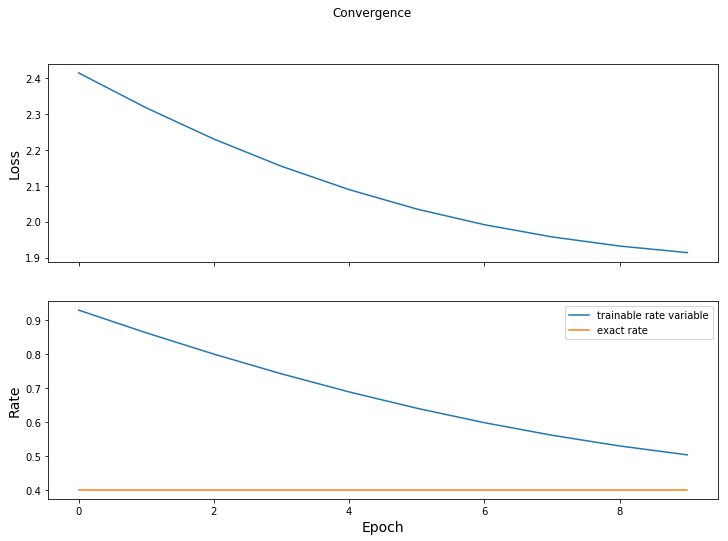

In [12]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [13]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [14]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [64]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [65]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [66]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)

In [ ]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))